[Reference](https://medium.com/nerd-for-tech/diving-deep-into-python-plotting-6d2baae4fde1)


In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.DataFrame(load_iris()["data"],columns=load_iris()['feature_names'])
data["species"] = load_iris()["target"]
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Adding Gridlines To a Plot


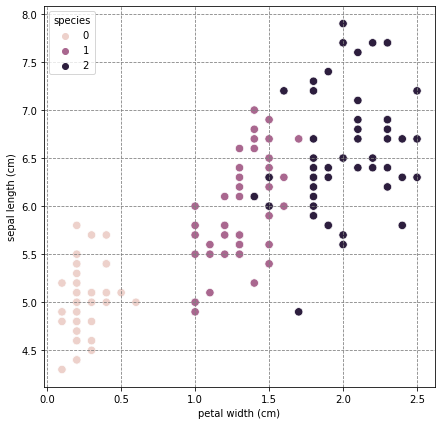

In [2]:
fig = plt.figure(figsize=(7,7))
sns.scatterplot(x="petal width (cm)",y="sepal length (cm)",data=data,hue="species",s=70)
plt.grid(linestyle="--",color="gray")

# Editing The Legend


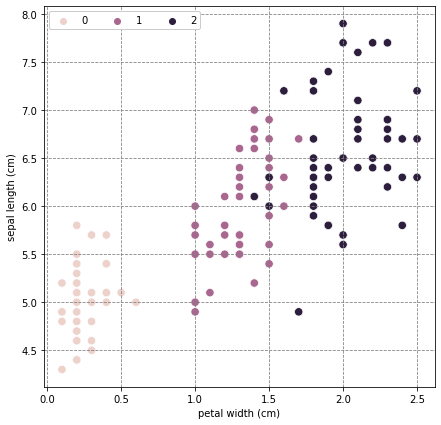

In [3]:
fig = plt.figure(figsize=(7,7))
sns.scatterplot(x="petal width (cm)",y="sepal length (cm)",data=data,hue="species",s=70)
plt.legend(loc="upper left",ncol=3,framealpha=1,fontsize=10)
plt.grid(linestyle="--",color="gray")

# Adding a Footnote To a Plot


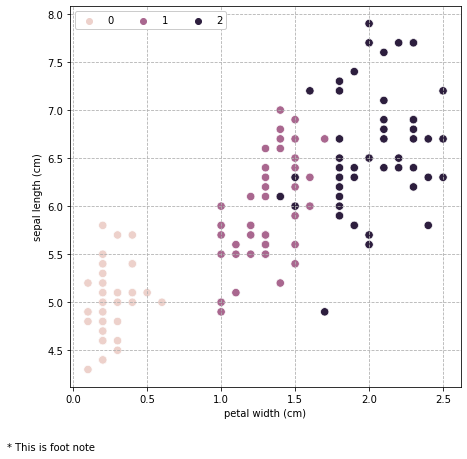

In [4]:
fig = plt.figure(figsize=(7,7))
sns.scatterplot(x="petal width (cm)",y="sepal length (cm)",data=data,hue="species",s=70)
plt.legend(loc="upper left",ncol=3,framealpha=1,fontsize=10)
plt.figtext(x=0,y=0,s="* This is foot note")
plt.grid(linestyle="--")

# Subplots


In [5]:
median_data  = data.groupby("species").median()
median_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
0,5.0,3.4,1.50,0.2
1,5.9,2.8,4.35,1.3
2,6.5,3.0,5.55,2.0


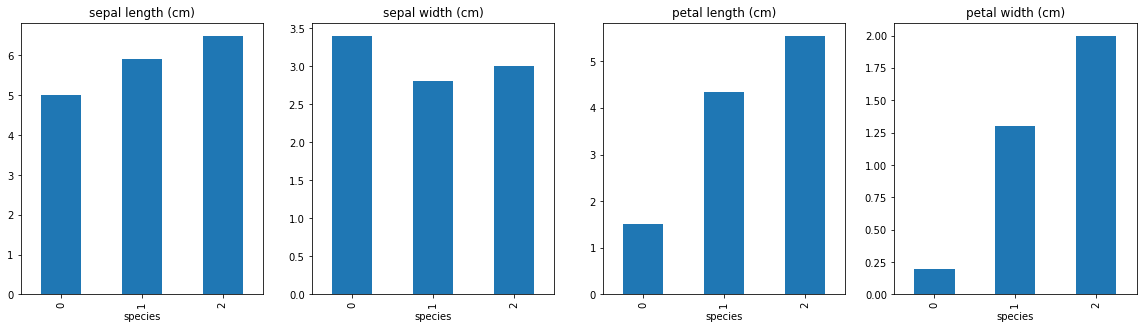

In [6]:
fig,ax = plt.subplots(1,4,figsize=(20,5))
col = 0
for n,i in enumerate(median_data.columns):
    median_data[i].plot(kind="bar",ax=ax[col])
    ax[col].set_title(i)
    col += 1
plt.show()

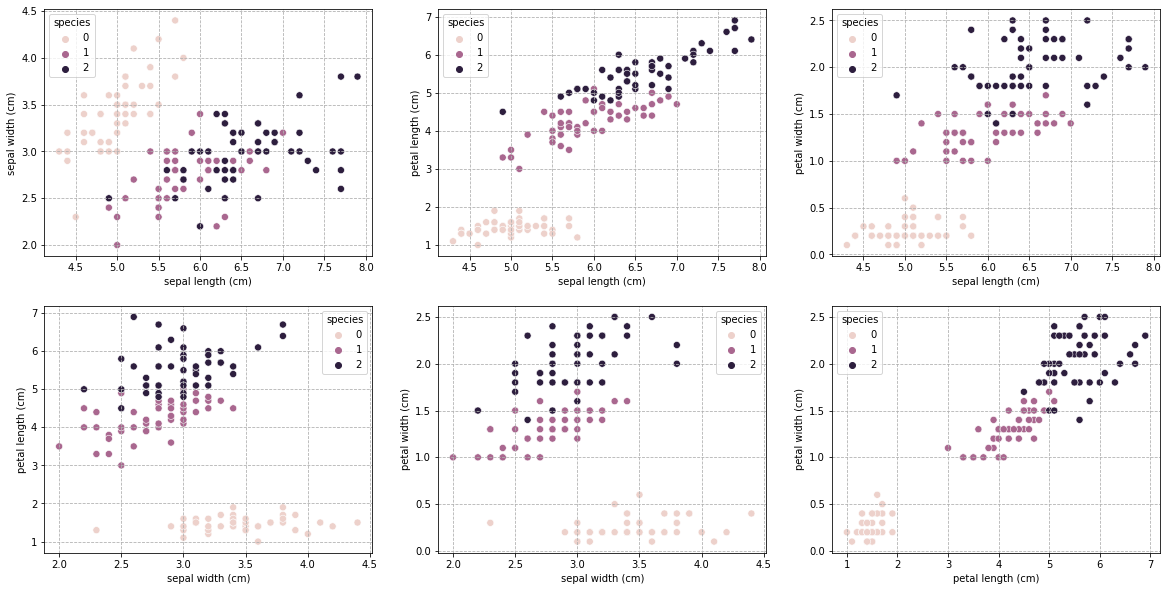

In [7]:
X = data.iloc[:,:-1].copy()
y = data["species"]
row = col = 0 # initializing row and column counters
n = 0 # counter variable
fig,ax = plt.subplots(2,3,figsize=(20,10))
for i in range(len(X.columns)-1):
    for j in range(i+1,len(X.columns)):
        if (n%3==0) & (n>0):
            col = 0
            row += 1
        sns.scatterplot(x=X.columns[i],y=X.columns[j],data=X,hue=y,ax=ax[row,col],s=50)
        ax[row,col].grid(linestyle="--")
        col += 1
        n += 1
plt.show()

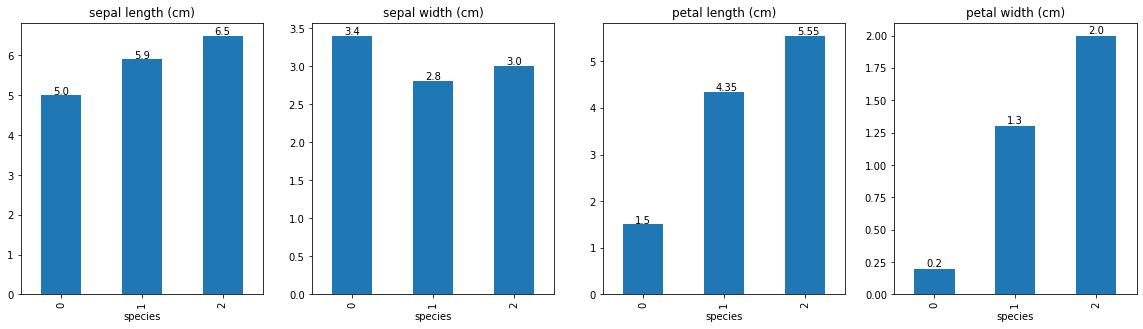

In [8]:
fig,ax = plt.subplots(1,4,figsize=(20,5))
col = 0
for i in median_data.columns:
    median_data[i].plot(kind="bar",ax=ax[col])
    ax[col].set_title(i)
    for n,j in enumerate(median_data.index):
        ax[col].text(x=n-0.1,y=median_data.loc[j,i]+0.02,s=median_data.loc[j,i])
    col += 1
plt.show()

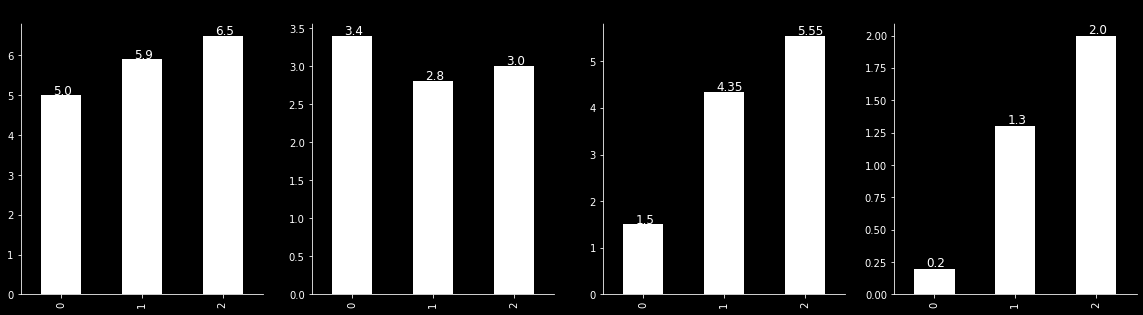

In [9]:
fig,ax = plt.subplots(1,4,figsize=(20,5))
fig.set_facecolor("black")
col = 0
for i in median_data.columns:
    median_data[i].plot(kind="bar",ax=ax[col],color="white")
    ax[col].set_title(i)
    for n,j in enumerate(median_data.index):
        ax[col].set_facecolor("black")
        
        #changing color of axis spines
        ax[col].spines["bottom"].set_color("white")
        ax[col].spines["left"].set_color("white")
        
        #changing x-axis label and tick colors
        ax[col].xaxis.label.set_color("white")
        ax[col].tick_params(axis='x', colors='white')
        
        #changing y-axis label and tick colors
        ax[col].yaxis.label.set_color("white")
        ax[col].tick_params(axis='y', colors='white')
        
        #removing x label
        ax[col].set_xlabel("")
        
        ax[col].text(x=n-0.1,y=median_data.loc[j,i]+0.02,s=median_data.loc[j,i],color="white",fontsize=12)
    col += 1
plt.show()

# Using Bubble Plot to Show Category Frequencies


In [10]:
species_count = pd.Series(y).value_counts()
species_count['setosa'] = 30
species_count['versicolor'] = 10
species_count = species_count.reset_index().copy()
species_count.columns = ["species","count"]
species_count

,species,count
0,0,50
1,1,50
2,2,50
3,setosa,30
4,versicolor,10


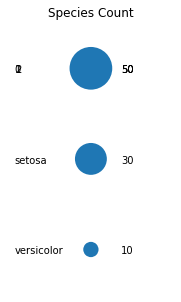

In [11]:
fig = plt.figure(figsize=(3,5))
sns.scatterplot(x=10,y=species_count['count'],size=species_count["count"],sizes=(300,2000),legend=False)
plt.title("Species Count")
plt.yticks(range(0,70,10))#setting custom y-ticks
plt.axis('off') #hiding the axes
for i in range(len(species_count)):
    plt.text(x=9.5,y=species_count.iloc[i,1]-1,s=species_count.iloc[i,0])
    plt.text(x=10.2,y=species_count.iloc[i,1]-1,s=species_count.iloc[i,1])